In [1]:
from baseball_scraper import playerid_lookup
from baseball_scraper import statcast_pitcher
from baseball_scraper import pitching_stats
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
from plotly.subplots import make_subplots
import plotly.graph_objs as go
#import plotly.offline as pyo
from plotly import tools
init_notebook_mode(connected=True)  
import plotly.figure_factory as ff

# Set notebook mode to work in offline
#pyo.init_notebook_mode()

In [2]:
playerid_lookup('cole', 'gerrit')

Gathering player lookup table. This may take a moment.


,name_last,name_first,key_mlbam,key_retro,key_bbref,key_fangraphs,mlb_played_first,mlb_played_last
0,cole,gerrit,543037,coleg001,colege01,13125,2013.0,2020.0


In [3]:
cole_stats = statcast_pitcher('2020-07-22', '2020-10-18',543037)

Gathering Player Data


In [4]:
cole_stats.columns

Index(['pitch_type', 'game_date', 'release_speed', 'release_pos_x',
       'release_pos_z', 'player_name', 'batter', 'pitcher', 'events',
       'description', 'spin_dir', 'spin_rate_deprecated',
       'break_angle_deprecated', 'break_length_deprecated', 'zone', 'des',
       'game_type', 'stand', 'p_throws', 'home_team', 'away_team', 'type',
       'hit_location', 'bb_type', 'balls', 'strikes', 'game_year', 'pfx_x',
       'pfx_z', 'plate_x', 'plate_z', 'on_3b', 'on_2b', 'on_1b',
       'outs_when_up', 'inning', 'inning_topbot', 'hc_x', 'hc_y',
       'tfs_deprecated', 'tfs_zulu_deprecated', 'fielder_2', 'umpire', 'sv_id',
       'vx0', 'vy0', 'vz0', 'ax', 'ay', 'az', 'sz_top', 'sz_bot',
       'hit_distance_sc', 'launch_speed', 'launch_angle', 'effective_speed',
       'release_spin_rate', 'release_extension', 'game_pk', 'pitcher.1',
       'fielder_2.1', 'fielder_3', 'fielder_4', 'fielder_5', 'fielder_6',
       'fielder_7', 'fielder_8', 'fielder_9', 'release_pos_y',
       'estima

In [5]:
cole_stats.head()

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,...,home_score,away_score,bat_score,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment
0,KC,2020-10-09,83.0,-1.91,5.79,Gerrit Cole,668227,543037,field_out,hit_into_play,...,1,1,1,1,1,1,1,1,Standard,Standard
1,CH,2020-10-09,91.2,-1.94,5.45,Gerrit Cole,664040,543037,field_out,hit_into_play,...,1,1,1,1,1,1,1,1,Infield shift,Standard
2,FF,2020-10-09,98.3,-2.11,5.54,Gerrit Cole,664040,543037,NaN,ball,...,1,1,1,1,1,1,1,1,Infield shift,Standard
3,FF,2020-10-09,96.4,-2.06,5.45,Gerrit Cole,640457,543037,home_run,hit_into_play_score,...,0,1,0,1,1,0,0,1,Infield shift,Standard
4,FF,2020-10-09,97.6,-1.93,5.58,Gerrit Cole,640457,543037,NaN,ball,...,0,1,0,1,1,0,0,1,Infield shift,Standard


### Gerrit Cole Pitch types and outcomes (description column) when it is 2 strikes

In [6]:
strike2 = cole_stats.strikes == 2
cole_strike2 = cole_stats[strike2]

strike2_pct = cole_strike2.pitch_type.value_counts() / len(cole_strike2)*100

print('Pitch Percentage when count is at 2 strikes\n{}'.format(strike2_pct))

Pitch Percentage when count is at 2 strikes
FF    44.779116
SL    31.124498
KC    19.076305
CH     5.020080
Name: pitch_type, dtype: float64


In [7]:
trace0 = go.Scatter(x = cole_strike2.plate_x[cole_strike2.pitch_type == 'FF'],
                   y = cole_strike2.plate_z[cole_strike2.pitch_type == 'FF'],
                   name = 'Four Seam Fastball',
                   mode = 'markers',
                   hovertext=cole_strike2.description,
                   marker = dict(size=10,
                                line=dict(width=2)
                                )
                   )

trace1 = go.Scatter(x = cole_strike2.plate_x[cole_strike2.pitch_type == 'SL'],
                   y = cole_strike2.plate_z[cole_strike2.pitch_type == 'SL'],
                   name = 'Slider',
                   mode = 'markers',
                   hovertext=cole_strike2.description,
                   marker = dict(size=10,
                                line=dict(width=2)
                                )
                   )

trace2 = go.Scatter(x = cole_strike2.plate_x[cole_strike2.pitch_type == 'KC'],
                   y = cole_strike2.plate_z[cole_strike2.pitch_type == 'KC'],
                   name = 'Knuckle Curve',
                   mode = 'markers',
                   hovertext=cole_strike2.description,
                   marker = dict(size=10,
                                line=dict(width=2)
                                )
                   )

trace3 = go.Scatter(x = cole_strike2.plate_x[cole_strike2.pitch_type == 'CH'],
                   y = cole_strike2.plate_z[cole_strike2.pitch_type == 'CH'],
                   name = 'Changeup',
                   mode = 'markers',
                   hovertext=cole_strike2.description,
                   marker = dict(size=10,
                                line=dict(width=2)
                                )
                   )

data = [trace0, trace1, trace2, trace3]

layout = dict(title = 'Pitch types of Gerrit Cole on 2 Strike Count 2020 ',
              yaxis = dict(zeroline = False),
              xaxis = dict(zeroline = False),
              height=700, width=700
             )

fig = dict(data=data, layout=layout)
py.iplot(fig, filename='styled-scatter')

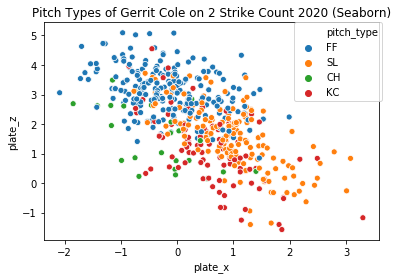

In [8]:
sns.scatterplot(x='plate_x', 
            y='plate_z', 
            hue='pitch_type', 
            data=cole_strike2,
           )
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
plt.title('Pitch Types of Gerrit Cole on 2 Strike Count 2020 (Seaborn)')
plt.show()

### Pitch Types Gerrit Cole Threw for a strikeout

In [9]:
strikeout = cole_stats.events == 'strikeout'
cole_k = cole_stats[strikeout]

k_pitch_pct = cole_k.pitch_type.value_counts() / len(cole_k)*100
print('Strikeout Pitch %\n{}'.format(k_pitch_pct))

Strikeout Pitch %
FF    41.129032
SL    29.838710
KC    24.193548
CH     4.838710
Name: pitch_type, dtype: float64


### Gerrit Cole Pitch Location on Every Strikeout 2020

In [10]:
trace0 = go.Scatter(x = cole_k.plate_x[cole_k.pitch_type == 'FF'],
                   y = cole_k.plate_z[cole_k.pitch_type == 'FF'],
                   name = 'Four Seam Fastball',
                   mode = 'markers',
                   marker = dict(size=10,
                                line=dict(width=2)
                                )
                   )

trace1 = go.Scatter(x = cole_k.plate_x[cole_k.pitch_type == 'SL'],
                   y = cole_k.plate_z[cole_k.pitch_type == 'SL'],
                   name = 'Slider',
                   mode = 'markers',
                   marker = dict(size=10,
                                line=dict(width=2)
                                )
                   )

trace2 = go.Scatter(x = cole_k.plate_x[cole_k.pitch_type == 'KC'],
                   y = cole_k.plate_z[cole_k.pitch_type == 'KC'],
                   name = 'Knuckle Curve',
                   mode = 'markers',
                   marker = dict(size=10,
                                line=dict(width=2)
                                )
                   )

trace3 = go.Scatter(x = cole_k.plate_x[cole_k.pitch_type == 'CH'],
                   y = cole_k.plate_z[cole_k.pitch_type == 'CH'],
                   name = 'Changeup',
                   mode = 'markers',
                   marker = dict(size=10,
                                line=dict(width=2)
                                )
                   )

fig = make_subplots(rows=2, cols=2)
fig.add_trace(trace0, row=1, col=1)
fig.add_trace(trace1, row=1, col=2)
fig.add_trace(trace2, row=2, col=1)
fig.add_trace(trace3, row=2, col=2)

fig.update_layout(title_text='Pitch Location on Gerrit Cole Strikeouts 2020',
                 yaxis=dict(zeroline=False),
                 xaxis=dict(zeroline=False),
                 height=900)

py.iplot(fig, filename='styled-scatter')

In [11]:
trace0 = go.Scatter(x = cole_k.plate_x[cole_k.pitch_type == 'FF'],
                   y = cole_k.plate_z[cole_k.pitch_type == 'FF'],
                   name = 'Four Seam Fastball',
                   mode = 'markers',
                   marker = dict(size=10,
                                line=dict(width=2)
                                )
                   )

trace1 = go.Scatter(x = cole_k.plate_x[cole_k.pitch_type == 'SL'],
                   y = cole_k.plate_z[cole_k.pitch_type == 'SL'],
                   name = 'Slider',
                   mode = 'markers',
                   marker = dict(size=10,
                                line=dict(width=2)
                                )
                   )

trace2 = go.Scatter(x = cole_k.plate_x[cole_k.pitch_type == 'KC'],
                   y = cole_k.plate_z[cole_k.pitch_type == 'KC'],
                   name = 'Knuckle Curve',
                   mode = 'markers',
                   marker = dict(size=10,
                                line=dict(width=2)
                                )
                   )

trace3 = go.Scatter(x = cole_k.plate_x[cole_k.pitch_type == 'CH'],
                   y = cole_k.plate_z[cole_k.pitch_type == 'CH'],
                   name = 'Changeup',
                   mode = 'markers',
                   marker = dict(size=10,
                                line=dict(width=2)
                                )
                   )

data = [trace0, trace1, trace2, trace3]

layout = dict(title = 'Pitch types of Gerrit Cole Strikeouts 2020 ',
              yaxis = dict(zeroline = False),
              xaxis = dict(zeroline = False),
              height=700, width=700
             )

fig = dict(data=data, layout=layout)
py.iplot(fig, filename='styled-scatter')


In [12]:
cole_stats.description.value_counts()

ball                       481
foul                       269
called_strike              241
swinging_strike            217
hit_into_play              145
hit_into_play_no_out        45
blocked_ball                30
foul_tip                    28
hit_into_play_score         24
swinging_strike_blocked     15
hit_by_pitch                 3
foul_bunt                    1
Name: description, dtype: int64

In [13]:
start_days = cole_stats.game_date.unique()
start_days

array(['2020-10-09', '2020-10-05', '2020-09-29', '2020-09-22',
       '2020-09-16', '2020-09-11', '2020-09-05', '2020-08-31',
       '2020-08-26', '2020-08-19', '2020-08-14', '2020-08-08',
       '2020-08-03', '2020-07-29', '2020-07-23'], dtype=object)

In [14]:
cole_stats.pitch_type.value_counts() / len(cole_stats)*100

FF    52.434957
SL    22.615077
KC    18.612408
CH     6.337558
Name: pitch_type, dtype: float64

In [15]:
cole_stats.events.value_counts()

field_out                    137
strikeout                    124
single                        32
walk                          20
home_run                      18
double                        16
force_out                      4
grounded_into_double_play      3
field_error                    3
hit_by_pitch                   3
fielders_choice_out            1
Name: events, dtype: int64

## Homeruns Hit Against Gerrit Cole

In [16]:
hr = cole_stats.events == 'home_run'
cole_hr = cole_stats[hr]
inning_hr = cole_hr.inning.value_counts()
print('Innings of HR Allowed by Gerrit Cole\n{}'.format(inning_hr))

Innings of HR Allowed by Gerrit Cole
4    4
3    4
1    4
5    2
2    2
7    1
6    1
Name: inning, dtype: int64


### Pitch Pie Chart of HRs Allowed

In [17]:
hr_pitch = cole_hr.pitch_type.value_counts() / len(cole_hr)*100
print('Pitch Type on HR Allowed\n{}'.format(hr_pitch))

fig = go.Figure(data=[go.Pie(labels=hr_pitch.index, 
                             values=hr_pitch,
                             title='Pitch Type on HR Allowed')])
fig.show()

Pitch Type on HR Allowed
FF    66.666667
SL    16.666667
KC    11.111111
CH     5.555556
Name: pitch_type, dtype: float64


### Pitch Locations of HRs Allowed

In [18]:
trace0 = go.Scatter(x = cole_hr.plate_x[cole_hr.pitch_type == 'FF'],
                   y = cole_hr.plate_z[cole_hr.pitch_type == 'FF'],
                   name = 'Four Seam Fastball',
                   mode = 'markers',
                   marker = dict(size=10,
                                line=dict(width=2)
                                )
                   )

trace1 = go.Scatter(x = cole_hr.plate_x[cole_hr.pitch_type == 'SL'],
                   y = cole_hr.plate_z[cole_hr.pitch_type == 'SL'],
                   name = 'Slider',
                   mode = 'markers',
                   marker = dict(size=10,
                                line=dict(width=2)
                                )
                   )

trace2 = go.Scatter(x = cole_hr.plate_x[cole_hr.pitch_type == 'KC'],
                   y = cole_hr.plate_z[cole_hr.pitch_type == 'KC'],
                   name = 'Knuckle Curve',
                   mode = 'markers',
                   marker = dict(size=10,
                                line=dict(width=2)
                                )
                   )

trace3 = go.Scatter(x = cole_hr.plate_x[cole_hr.pitch_type == 'CH'],
                   y = cole_hr.plate_z[cole_hr.pitch_type == 'CH'],
                   name = 'Changeup',
                   mode = 'markers',
                   marker = dict(size=10,
                                line=dict(width=2)
                                )
                   )

data = [trace0, trace1, trace2, trace3]

layout = dict(title = 'Pitch types and Location of Gerrit Cole Homeruns Allowed 2020 ',
              yaxis = dict(zeroline = False),
              xaxis = dict(zeroline = False),
              height=700, width=700
             )

fig = dict(data=data, layout=layout)
py.iplot(fig, filename='styled-scatter')


In [19]:
cole_hr[['pitch_type', 'release_speed', 'batter', 'inning', 'balls', 'strikes']]

,pitch_type,release_speed,batter,inning,balls,strikes
3,FF,96.4,640457,5,1,1
141,FF,95.8,596847,4,1,1
180,FF,96.4,668227,1,2,0
246,SL,87.8,647304,4,0,1
356,FF,95.6,624415,4,1,1
646,FF,96.0,621466,6,1,0
793,FF,97.0,595281,2,1,1
803,SL,89.3,596847,1,1,2
859,KC,83.0,542303,3,1,1
865,SL,90.0,621020,3,2,1


In [20]:
all_events = cole_stats.loc[cole_stats['events'].notnull(),['pitch_type', 'release_speed','events', 'inning', 'balls', 'strikes', 'inning', 'at_bat_number', 'pitch_number']]
all_events.head()

,pitch_type,release_speed,events,inning,balls,strikes,inning,at_bat_number,pitch_number
0,KC,83.0,field_out,6,0,0,6,44,1
1,CH,91.2,field_out,5,1,0,5,38,2
3,FF,96.4,home_run,5,1,1,5,37,3
6,FF,98.7,strikeout,5,2,2,5,36,6
12,KC,82.9,field_out,5,1,1,5,35,3


## Event Percentages on every pitch type

In [21]:
FF_events = all_events[all_events.pitch_type == 'FF']

FF_events['events'].value_counts() / len(FF_events)

field_out                    0.448980
strikeout                    0.260204
single                       0.096939
walk                         0.066327
home_run                     0.061224
double                       0.051020
hit_by_pitch                 0.005102
force_out                    0.005102
grounded_into_double_play    0.005102
Name: events, dtype: float64

In [22]:
KC_events = all_events[all_events.pitch_type == 'KC']

KC_events['events'].value_counts() / len(KC_events)

strikeout              0.483871
field_out              0.274194
single                 0.096774
double                 0.032258
field_error            0.032258
home_run               0.032258
force_out              0.016129
walk                   0.016129
fielders_choice_out    0.016129
Name: events, dtype: float64

In [23]:
SL_events = all_events[all_events.pitch_type == 'SL']

SL_events['events'].value_counts() / len(SL_events)

strikeout                    0.420455
field_out                    0.295455
walk                         0.068182
single                       0.068182
double                       0.034091
home_run                     0.034091
grounded_into_double_play    0.022727
hit_by_pitch                 0.022727
force_out                    0.022727
field_error                  0.011364
Name: events, dtype: float64

In [24]:
CH_events = all_events[all_events.pitch_type == 'CH']

CH_events['events'].value_counts() / len(CH_events)

field_out    0.400000
strikeout    0.400000
double       0.066667
single       0.066667
home_run     0.066667
Name: events, dtype: float64

## Gerrit Cole Injury History

I was curious about Cole's Pittsburgh Pirates Stint. Specifically during the 2014 and 2016 seasons in terms of pitch usage and pitch counts per game. Since then, Gerrit Cole became the GOAT lol

### June 7-28, 2014: Shoulder Fatigue

In [25]:
sample = statcast_pitcher('2014-03-29', '2020-10-18',543037)

Gathering Player Data


/Users/paulomacasaet/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3325: DtypeWarning:

Columns (87,88) have mixed types. Specify dtype option on import or set low_memory=False.



In [26]:
sample.head()

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,...,home_score,away_score,bat_score,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment
0,FF,2019-10-27,98.2,-1.85,5.62,Gerrit Cole,645302,543037,strikeout,called_strike,...,1,4,1,4,4,1,1,4,Standard,Standard
1,FF,2019-10-27,99.8,-2.11,5.61,Gerrit Cole,645302,543037,NaN,ball,...,1,4,1,4,4,1,1,4,Standard,Standard
2,FF,2019-10-27,98.4,-1.90,5.72,Gerrit Cole,645302,543037,NaN,called_strike,...,1,4,1,4,4,1,1,4,Standard,Standard
3,FF,2019-10-27,98.0,-1.76,5.76,Gerrit Cole,645302,543037,NaN,ball,...,1,4,1,4,4,1,1,4,Standard,Standard
4,FF,2019-10-27,97.5,-2.10,5.60,Gerrit Cole,645302,543037,NaN,swinging_strike,...,1,4,1,4,4,1,1,4,Standard,Standard


In [27]:
cole14 = sample[sample['game_year'] == 2014]
cole14 = cole14.iloc[::-1].reset_index() # reverse rows to beginning of season

In [28]:
before = cole14.loc[0:1204]

In [38]:
# Get all starts of the timeframe
starts = before.game_date.unique()
print(starts)
print('Total Starts Before Injury: {}'.format(len(starts)))

['2014-04-04' '2014-04-10' '2014-04-15' '2014-04-20' '2014-04-25'
 '2014-05-02' '2014-05-07' '2014-05-13' '2014-05-18' '2014-05-24'
 '2014-05-29' '2014-06-03']
Total Starts Before Injury: 12


In [45]:
sns.set(rc={'figure.figsize':(11,  8)})

### Pitch Speed Distribution Per Game

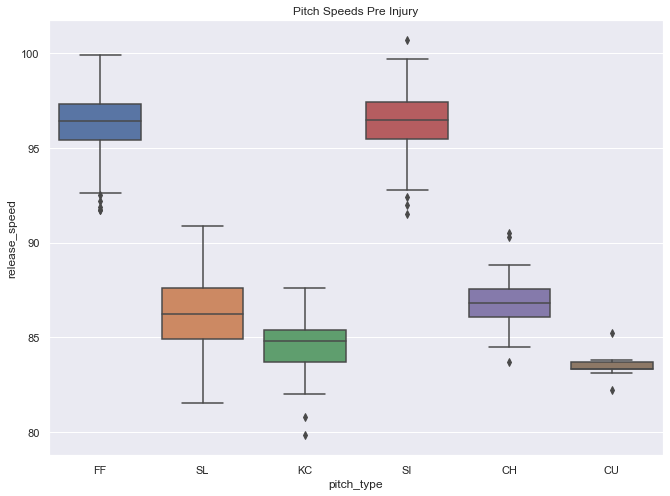

In [46]:
ax = sns.boxplot(x='pitch_type', y='release_speed', data=before)
plt.title('Pitch Speeds Pre Injury')
plt.show()

### Pitch Type Distribution Collated

In [29]:
before.pitch_type.value_counts() / len(before) * 100

FF    55.352697
SL    19.253112
SI    11.618257
KC     7.717842
CH     5.311203
CU     0.746888
Name: pitch_type, dtype: float64

### Pitch Types and Pitch Count of Starts before injury

In [47]:
def pitchTypesAndTotal(df, date):
    start = df[df['game_date'] == date]
    distribution = start.pitch_type.value_counts()
    pitchCount = 'Pitch Count: {}'.format(len(start))
    return distribution, pitchCount

In [48]:
for i in starts:
    print(pitchTypesAndTotal(before, i))
    print()

(FF    63
KC    18
SL    17
SI     5
CH     3
CU     2
Name: pitch_type, dtype: int64, 'Pitch Count: 108')

(FF    35
SI    27
SL    27
CH     5
CU     4
KC     2
Name: pitch_type, dtype: int64, 'Pitch Count: 100')

(FF    56
SL    30
KC     8
SI     3
CU     1
Name: pitch_type, dtype: int64, 'Pitch Count: 98')

(FF    58
SL    16
SI     8
KC     6
CH     2
CU     1
Name: pitch_type, dtype: int64, 'Pitch Count: 91')

(SI    41
FF    32
SL    24
KC     3
CH     2
Name: pitch_type, dtype: int64, 'Pitch Count: 102')

(FF    63
SL    14
KC    12
CH     4
CU     1
SI     1
Name: pitch_type, dtype: int64, 'Pitch Count: 95')

(FF    64
SL    15
KC    11
SI    11
CH     6
Name: pitch_type, dtype: int64, 'Pitch Count: 107')

(FF    48
SL    22
SI    18
CH    13
KC     4
Name: pitch_type, dtype: int64, 'Pitch Count: 105')

(FF    60
SL    19
CH    13
KC     4
SI     3
Name: pitch_type, dtype: int64, 'Pitch Count: 99')

(FF    75
SL    18
SI     7
KC     7
CH     5
Name: pitch_type, dtype: int64,

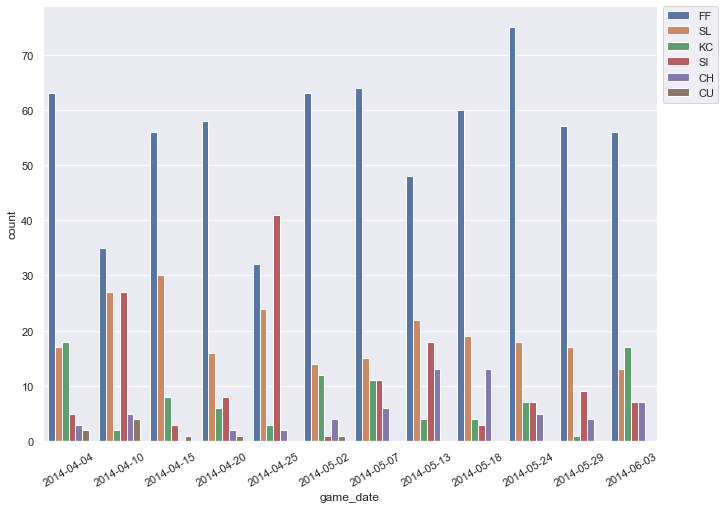

In [57]:
ax = sns.countplot(x='game_date',
                  hue='pitch_type',
                  data=before)
ax.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
plt.show()

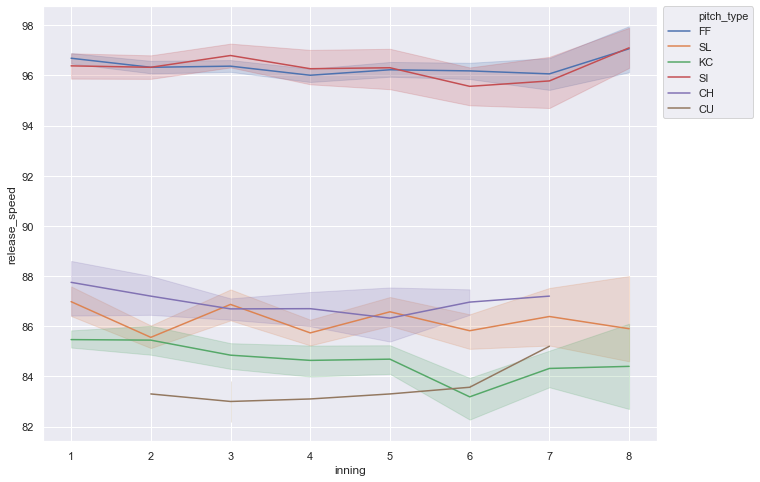

In [52]:
ax = sns.lineplot(x='inning', y='release_speed', hue='pitch_type', data=before)
ax.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
plt.show()

In [34]:
after = cole14.loc[1205:]
after.tail()

,index,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,...,home_score,away_score,bat_score,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment
2192,15914,FF,2014-09-28,99.2,NaN,NaN,Gerrit Cole,519023,543037,strikeout,...,1,1,1,1,1,1,1,1,NaN,NaN
2193,15913,SL,2014-09-28,86.3,NaN,NaN,Gerrit Cole,457803,543037,single,...,1,1,1,1,1,1,1,1,NaN,NaN
2194,15912,SI,2014-09-28,97.2,NaN,NaN,Gerrit Cole,502317,543037,NaN,...,1,1,1,1,1,1,1,1,NaN,NaN
2195,15911,SI,2014-09-28,98.1,NaN,NaN,Gerrit Cole,502317,543037,NaN,...,1,1,1,1,1,1,1,1,NaN,NaN
2196,15910,SL,2014-09-28,87.5,NaN,NaN,Gerrit Cole,502317,543037,field_out,...,1,1,1,1,1,1,1,1,NaN,NaN


In [35]:
starts = after.game_date.unique()
print(starts)
print('Total Starts After Injury: {}'.format(len(starts)))

['2014-06-28' '2014-07-04' '2014-08-20' '2014-08-26' '2014-09-01'
 '2014-09-07' '2014-09-12' '2014-09-18' '2014-09-23' '2014-09-28']
Total Starts After Injury: 10


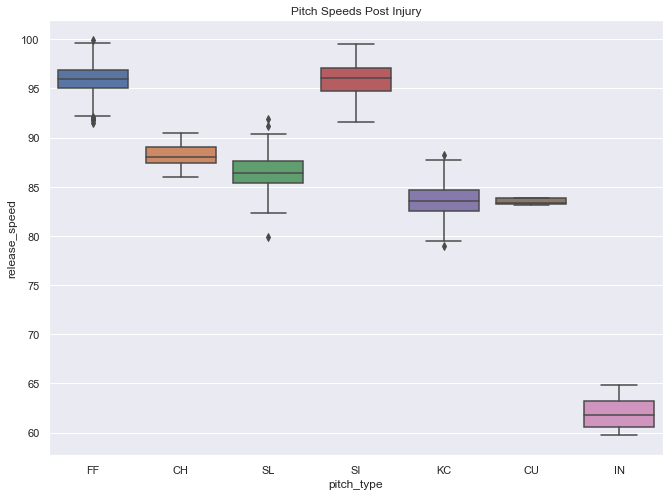

In [58]:
ax = sns.boxplot(x='pitch_type', y='release_speed', data=after)
plt.title('Pitch Speeds Post Injury')
plt.show()

In [36]:
for i in starts:
    print(pitchTypesAndTotal(after, i))
    print()

(FF    63.440860
SL    17.204301
CH     7.526882
KC     5.376344
SI     5.376344
CU     1.075269
Name: pitch_type, dtype: float64, 'Pitch Count: 93')

(FF    61.25
SL    22.50
KC     8.75
SI     6.25
CH     1.25
Name: pitch_type, dtype: float64, 'Pitch Count: 80')

(FF    46.391753
SI    16.494845
KC    15.463918
SL    11.340206
IN     4.123711
CH     4.123711
CU     2.061856
Name: pitch_type, dtype: float64, 'Pitch Count: 97')

(FF    46.296296
SL    25.000000
SI    19.444444
KC     5.555556
CH     2.777778
CU     0.925926
Name: pitch_type, dtype: float64, 'Pitch Count: 108')

(SI    52.127660
SL    20.212766
FF    13.829787
KC     8.510638
CH     4.255319
CU     1.063830
Name: pitch_type, dtype: float64, 'Pitch Count: 94')

(FF    36.792453
SI    26.415094
CH    13.207547
SL    12.264151
KC    10.377358
CU     0.943396
Name: pitch_type, dtype: float64, 'Pitch Count: 106')

(FF    53.398058
SL    14.563107
KC    14.563107
SI     7.766990
CH     6.796117
CU     2.912621
Name: pitch_typ

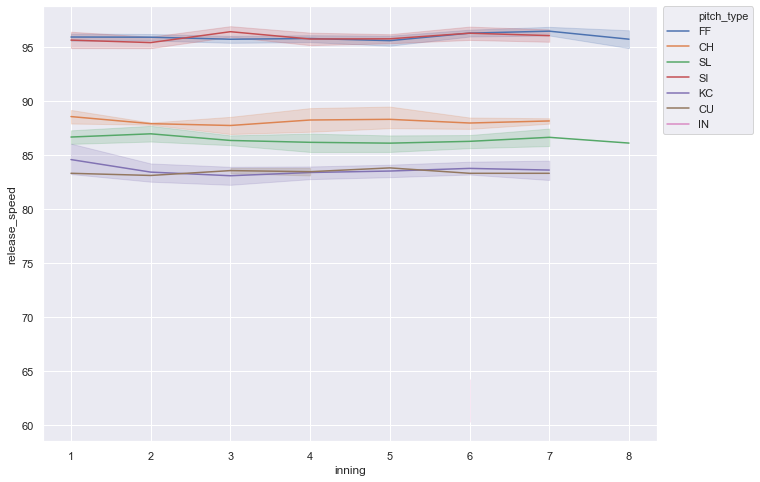

In [59]:
ax = sns.lineplot(x='inning', y='release_speed', hue='pitch_type', data=after)
ax.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
plt.show()

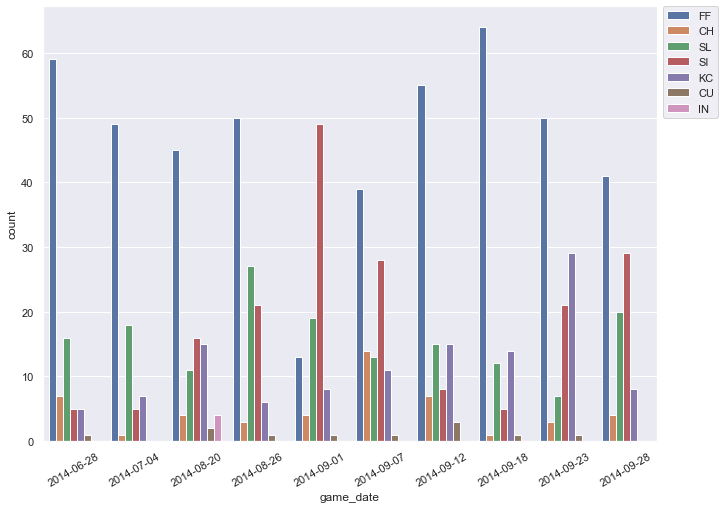

In [60]:
ax = sns.countplot(x='game_date',
                  hue='pitch_type',
                  data=after)
ax.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
plt.show()